In [2]:
import pandas as pd

In [3]:
diabetes = pd.read_csv('pima-indians-diabetes.csv')
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [4]:
 diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [5]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [6]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [7]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [8]:
import tensorflow as tf

In [9]:
diabetes.columns
diabetes['Group'].unique()

array(['B', 'C', 'A', 'D'], dtype=object)

In [10]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [11]:
assign_group = tf.feature_column.categorical_column_with_vocabulary_list('Group', diabetes['Group'].unique())

OR

In [12]:
#assign_group = tf.feature_column.categorical_column_with_hash_bucket('Group', hash_bucket_size=10)

In [13]:
?tf.feature_column.categorical_column_with_hash_bucket

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

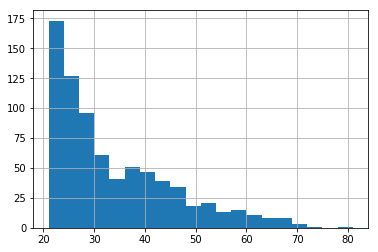

In [15]:
diabetes['Age'].hist(bins=20)

## numerical to categorical

In [16]:
age_bucket = tf.feature_column.bucketized_column(age, boundaries=[20,30,40,50,60,70,80])

In [17]:
feat_cols = [num_preg,plasma_gluc,dias_press,tricep,insulin,bmi,diabetes_pedigree, assign_group, age_bucket]

In [18]:
x_data = diabetes.drop('Class', axis=1)
labels = diabetes['Class']

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, labels, test_size = 0.3, random_state = 101)

In [20]:
input_fun = tf.estimator.inputs.pandas_input_fn(x = X_train, y= y_train, batch_size=10, num_epochs=1000, shuffle=True)

In [21]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\motos\\AppData\\Local\\Temp\\tmp_1wptsht', '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_save_summary_steps': 100, '_tf_random_seed': 1, '_session_config': None, '_keep_checkpoint_every_n_hours': 10000, '_keep_checkpoint_max': 5, '_log_step_count_steps': 100}


In [22]:
model.train(input_fn=input_fun, steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\motos\AppData\Local\Temp\tmp_1wptsht\model.ckpt.
INFO:tensorflow:step = 1, loss = 6.93147
INFO:tensorflow:global_step/sec: 271.511
INFO:tensorflow:step = 101, loss = 4.53091 (0.372 sec)
INFO:tensorflow:global_step/sec: 319.062
INFO:tensorflow:step = 201, loss = 5.64931 (0.313 sec)
INFO:tensorflow:global_step/sec: 297.287
INFO:tensorflow:step = 301, loss = 4.24008 (0.336 sec)
INFO:tensorflow:global_step/sec: 303.134
INFO:tensorflow:step = 401, loss = 5.20742 (0.330 sec)
INFO:tensorflow:global_step/sec: 327.403
INFO:tensorflow:step = 501, loss = 5.28152 (0.308 sec)
INFO:tensorflow:global_step/sec: 291.662
INFO:tensorflow:step = 601, loss = 7.26076 (0.343 sec)
INFO:tensorflow:global_step/sec: 327.403
INFO:tensorflow:step = 701, loss = 5.4962 (0.305 sec)
INFO:tensorflow:global_step/sec: 269.317
INFO:tensorflow:step = 801, loss = 4.75094 (0.370 sec)
INFO:tensorflow:global_step/sec: 311.135
INF

In [23]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test, y=y_test, batch_size=10, num_epochs=1, shuffle=False)
train_input_func = tf.estimator.inputs.pandas_input_fn(x=X_train, y=y_train, batch_size=10, num_epochs=1, shuffle=False)

In [24]:
results_train = model.evaluate(train_input_func)
results_eval = model.evaluate(eval_input_func)
print('\n Results \n')
print(results_train)
print('\n')
print(results_eval)

INFO:tensorflow:Starting evaluation at 2018-10-26-18:56:51
INFO:tensorflow:Restoring parameters from C:\Users\motos\AppData\Local\Temp\tmp_1wptsht\model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2018-10-26-18:56:52
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.73743, accuracy_baseline = 0.651769, auc = 0.795875, auc_precision_recall = 0.660624, average_loss = 0.524698, global_step = 1000, label/mean = 0.348231, loss = 5.21783, prediction/mean = 0.333577
INFO:tensorflow:Starting evaluation at 2018-10-26-18:56:57
INFO:tensorflow:Restoring parameters from C:\Users\motos\AppData\Local\Temp\tmp_1wptsht\model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2018-10-26-18:56:58
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.727273, accuracy_baseline = 0.649351, auc = 0.798395, auc_precision_recall = 0.638142, average_loss = 0.526984, global_step = 1000, label/mean = 0.350649, loss = 5.07222, prediction/mean = 0.342666

 Results 

{'loss': 5.2178273, 'gl

## result

In [27]:
results_train

{'accuracy': 0.73743016,
 'accuracy_baseline': 0.6517691,
 'auc': 0.79587477,
 'auc_precision_recall': 0.66062355,
 'average_loss': 0.52469772,
 'global_step': 1000,
 'label/mean': 0.3482309,
 'loss': 5.2178273,
 'prediction/mean': 0.33357733}

In [28]:
X_test.iloc[[1]]

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
748,0.176471,0.939698,0.57377,0.222222,0.236407,0.542474,0.140905,36,B


In [29]:
 y_test.iloc[[1]]

748    1
Name: Class, dtype: int64

In [30]:
pred_input_fun = tf.estimator.inputs.pandas_input_fn(x=X_test.iloc[[1]], batch_size = 1, num_epochs=1, shuffle=False)

In [31]:
predictions = model.predict(pred_input_fun)

In [32]:
my_pred = list(predictions)

INFO:tensorflow:Restoring parameters from C:\Users\motos\AppData\Local\Temp\tmp_1wptsht\model.ckpt-1000


In [33]:
my_pred

[{'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'logistic': array([ 0.59842002], dtype=float32),
  'logits': array([ 0.3988862], dtype=float32),
  'probabilities': array([ 0.40157998,  0.59842002], dtype=float32)}]

# DNN Classifiers

In [36]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10], feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\motos\\AppData\\Local\\Temp\\tmpjrx5fkzv', '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_save_summary_steps': 100, '_tf_random_seed': 1, '_session_config': None, '_keep_checkpoint_every_n_hours': 10000, '_keep_checkpoint_max': 5, '_log_step_count_steps': 100}


In [37]:
embedded_group_col = tf.feature_column.embedding_column(assign_group, dimension=4)

In [38]:
feat_cols = [num_preg,plasma_gluc,dias_press,tricep,insulin,bmi,diabetes_pedigree, embedded_group_col, age_bucket]

In [39]:
input_fun = tf.estimator.inputs.pandas_input_fn(X_train, y_train, batch_size=10, num_epochs=1000, shuffle=True)

In [53]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10, 10, 10, 10], feature_columns=feat_cols, n_classes=2)

dnn_model.train(input_fn=input_fun, steps=1000)

eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test, y=y_test, batch_size=10, num_epochs=1, shuffle=False)

dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\motos\\AppData\\Local\\Temp\\tmp6zssav1b', '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_save_summary_steps': 100, '_tf_random_seed': 1, '_session_config': None, '_keep_checkpoint_every_n_hours': 10000, '_keep_checkpoint_max': 5, '_log_step_count_steps': 100}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\motos\AppData\Local\Temp\tmp6zssav1b\model.ckpt.
INFO:tensorflow:step = 1, loss = 7.4807
INFO:tensorflow:global_step/sec: 379.508
INFO:tensorflow:step = 101, loss = 6.40577 (0.265 sec)
INFO:tensorflow:global_step/sec: 395.207
INFO:tensorflow:step = 201, loss = 3.6305 (0.255 sec)
INFO:tensorflow:global_step/sec: 380.937
INFO:tensorflow:step = 301, loss = 5.6794 (0.262 sec)
INFO:tensorflow:global_step/sec: 402.351
INFO:tensorflow:step = 401, loss = 4.82702 (0.249 sec)
INFO:tensorflow:global_step/sec: 393.652
INFO:tensorflo

{'accuracy': 0.75324672,
 'accuracy_baseline': 0.64935064,
 'auc': 0.8138684,
 'auc_precision_recall': 0.63868171,
 'average_loss': 0.50984645,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 4.9072719,
 'prediction/mean': 0.39106318}